In [25]:
import json

def concat_strings(json_file):
    with open(json_file, "r") as f:
        json_data = json.load(f)
    
    with open("scripts_concat.txt", "w") as f:
        for movie in json_data.keys():
            movie_script = json_data[movie]['script']

            f.write(movie_script)

concat_strings('movies_scripts.json')


total number of words: 464369
average number of words per file: 23218.45
standard deviation of amount of words per script: 9364.497864836445


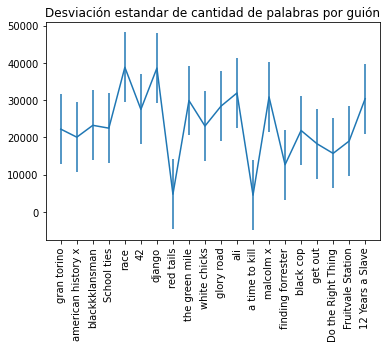

In [26]:
# number of words
import json
from math import sqrt
import matplotlib.pyplot as plt

def total_number_of_words(scripts_file):
    with open(scripts_file, "r") as f:
        scripts = f.read()
    
    return len(scripts.split())

print("total number of words: {}".format(total_number_of_words("scripts_concat.txt")))

def average_number_of_words_per_scripts(movie_scripts_json, scripts_file):
    with open(movie_scripts_json, "r") as f:
        movies_dict = json.load(f)
    
    total_num_words = total_number_of_words(scripts_file)
    mean = total_num_words / len(movies_dict.keys())
    return mean

print("average number of words per file: {}".format(average_number_of_words_per_scripts("movies_scripts.json", "scripts_concat.txt")))

def standard_deviation_scripts(movie_scripts_json, scripts_file):
    mean = average_number_of_words_per_scripts(movie_scripts_json, scripts_file)

    with open(movie_scripts_json, "r") as f:
        movies_dict = json.load(f)
    
    movies_name = list(movies_dict.keys())
    movies_scripts = map(lambda d: d["script"], movies_dict.values())
    
    words_counts = list(map(lambda s: len(s.split()), movies_scripts))

    movies_words_variance = list(map(lambda x: (x - mean) ** 2, words_counts))

    std_deviation = sqrt(sum(movies_words_variance) / (len(movies_name) - 1) )

    print("standard deviation of amount of words per script: {}".format(std_deviation))

    plt.errorbar(x=movies_name, y=words_counts, yerr=std_deviation)
    plt.xticks(rotation = 90)
    plt.title("Desviación estandar de cantidad de palabras por guión")
    plt.show()

standard_deviation_scripts("movies_scripts.json", "scripts_concat.txt")



In [27]:
from collections import Counter

def words_counter(scripts_concat_file):
    with open(scripts_concat_file, "r") as f:
        words = f.read().split()
    
    #print(words)
    
    counts = Counter(words)
    return counts.most_common()

words_counter("scripts_concat.txt")

[('the', 17928),
 ('a', 9372),
 ('to', 9174),
 ('and', 8332),
 ('of', 6100),
 ('I', 5526),
 ('in', 5038),
 ('you', 4797),
 ('his', 4418),
 ('is', 4273),
 ('on', 3134),
 ('-', 3074),
 ('The', 2924),
 ('with', 2764),
 ('He', 2596),
 ('at', 2594),
 ('he', 2233),
 ('for', 2220),
 ('it', 2129),
 ('that', 2055),
 ('as', 1923),
 ('You', 1749),
 ('are', 1650),
 ('from', 1581),
 ('her', 1574),
 ('up', 1533),
 ('out', 1514),
 ('be', 1383),
 ('INT.', 1343),
 ('have', 1316),
 ('your', 1268),
 ('him', 1256),
 ("I'm", 1251),
 ('not', 1208),
 ('this', 1169),
 ('my', 1161),
 ('looks', 1160),
 ('A', 1140),
 ('like', 1138),
 ('was', 1075),
 ('we', 1075),
 ("don't", 1062),
 ('but', 1040),
 ('me', 1030),
 ('all', 993),
 ('just', 974),
 ('into', 947),
 ('by', 931),
 ('back', 929),
 ('do', 908),
 ('get', 905),
 ('what', 890),
 ('She', 885),
 ('--', 876),
 ('they', 867),
 ('about', 847),
 ('an', 843),
 ('And', 839),
 ('can', 833),
 ('one', 831),
 ("It's", 822),
 ('it.', 817),
 ('over', 813),
 ('down', 797),
